#                                             分别用excel、jupyter做一元线性回归分析

# 一、 相关数学知识的定义

## 1.1 一元线性回归的定义

  一元线性回归分析预测法，是根据自变量x和因变量Y的相关关系，建立X与Y的线性回归方程进行预测的方法。由于市场现象一般是受多种因素的影响，而并不是仅仅受一个因素的影响。所以应用一元线性回归分析预测法，必须对影响市场现象的多种因素做全面分析。只有当诸多的影响因素中，确实存在一个对因变量影响作用明显高于其他因素的变量，才能将它作为自变量，应用一元相关回归分析市场预测法进行预测。
  一元线性回归分析法的预测模型如下：

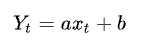

式中，xt代表t期自变量的值；
代表t期因变量的值；
a、b代表一元线性回归方程的参数。
a、b参数由下列公式求得（用代表）：

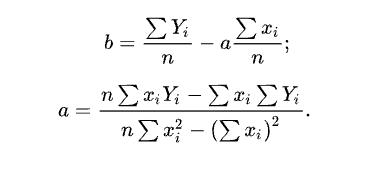

##  1.2  相关系数R²的定义

表征依变数Y的变异中有多少百分比,可由控制的自变数X来解释.
相关系数（coefficient of correlation）的平方即为决定系数。它与相关系数的区别在于除掉|R|=0和1情况，
由于R2<R,可以防止对相关系数所表示的相关做夸张的解释。
确定系数：在Y的总平方和中，由X引起的平方和所占的比例，记为R2(R的平方)
确定系数的大小决定了相关的密切程度。
当R2越接近1时，表示相关的方程式参考价值越高；相反，越接近0时，表示参考价值越低。这是在一元回归分3析中的情况。但从本质上说确定系数和回归系数没有关系，就像标准差和标准误差在本质上没有关系一样。
在多元回归分析中，确定系数是通径系数的平方。
表达式：R2=SSR/SST=1-SSE/SST
其中：SST=SSR+SSE，SST (total sum of squares)为总平方和，SSR (regression sum of squares)为回归平方和，SSE (error sum of squares) 为残差平方和。
注：（不同书命名不同）
回归平方和：SSR(Sum of Squares for regression) = ESS (explained sum of squares)
残差平方和：SSE（Sum of Squares for Error） = RSS (residual sum of squares)
总离差平方和：SST(Sum of Squares for total) = TSS(total sum of squares)
SSE+SSR=SST RSS+ESS=TSS
意义：拟合优度越大，自变量对因变量的解释程度越高，自变量引起的变动占总变动的百分比高。观察点在回归直线附近越密集。
取值范围：0-1.

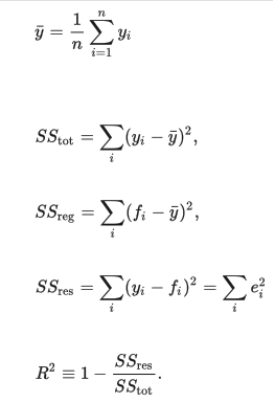

## 二、使用jupyter来做一元线性回归分析

### 2.1 根据最小二乘法公式手动构建一元线性回归模型

In [78]:
#不掉包实现一元线性回归
import pandas as pd
def read_file(raw):#根据行数来读取文件
    df = pd.read_excel('..\\source\\weights_heights(身高-体重数据集).xls',sheet_name ='weights_heights')
    height=df.iloc[0:raw,1:2].values
    weight=df.iloc[0:raw,2:3].values
    return height,weight

def array_to_list(array):#将数组转化为列表
    array=array.tolist()
    for i in range(0,len(array)):
        array[i]=array[i][0]
    return array

def unary_linear_regression(x,y):#一元线性回归，x,y都是列表类型
    xi_multiply_yi=0
    xi_square=0;
    x_average=0;
    y_average=0;
    f=x
    for i in range(0,len(x)):
        xi_multiply_yi+=x[i]*y[i]
        x_average+=x[i]
        y_average+=y[i]
        xi_square+=x[i]*x[i]
    x_average=x_average/len(x)
    y_average=y_average/len(x)
    b=(xi_multiply_yi-len(x)*x_average*y_average)/(xi_square-len(x)*x_average*x_average)
    a=y_average-b*x_average
    for i in range(0,len(x)):
        f[i]=b*x[i]+a
    R_square=get_coefficient_of_determination(f,y,y_average)
    print('R_square='+str(R_square)+'\n'+'a='+str(a)+'  b='+str(b))
    
def get_coefficient_of_determination(f,y,y_average):#传输计算出的值f和x,y的真实值还有平均值y_average，获取决定系数，也就是R²
    res=0
    tot=0
    for i in range(0,len(y)):
        res+=(y[i]-f[i])*(y[i]-f[i])
        tot+=(y[i]-y_average)*(y[i]-y_average)
    R_square=1-res/tot 
    return R_square

raw=[20,200,2000,20000]
for i in raw:
    print('数据组数为'+str(i)+":")
    height,weight=read_file(i)
    height=array_to_list(height)
    weight=array_to_list(weight)
    unary_linear_regression(height,weight)

数据组数为20:
r_square=0.3254230249366249
a=-152.2337845347941  b=4.128037498893684
数据组数为200:
r_square=0.3099955343309224
a=-105.95901104659464  b=3.431665151628346
数据组数为2000:
r_square=0.24830120336384154
a=-73.66078552286038  b=2.955526969800193
数据组数为20000:
r_square=0.25133881130517133
a=-81.69096449054486  b=3.071021428426565


### 2.2 调用包实现一元线性回归模型

In [96]:
#调包实现一元线性回归
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
def read_file(raw):#根据行数来读取文件
    df = pd.read_excel('..\\source\\weights_heights(身高-体重数据集).xls',sheet_name ='weights_heights')
    height=df.iloc[0:raw,1:2].values
    weight=df.iloc[0:raw,2:3].values
    return height,weight

raw=[20,200,2000,20000]#要读取的行数
for i in raw:
    print('数据组数为'+str(i)+":")
    height,weight=read_file(i)
    weight_predict=weight
    lm = linear_model.LinearRegression()
    lm.fit(height,weight)
    b=lm.coef_
    a=lm.intercept_
    weight_predict=lm.predict(height)#计算有方程推测出来的值
    R_square=r2_score(weight,weight_predict)#计算方差
    print('b='+str(b[0][0])+' a='+str(a[0]))
    print('R_square='+str(R_square))
    

数据组数为20:
b=4.128037498890454 a=-152.23378453457306
R_square=0.3254230249366249
数据组数为200:
b=3.4316651516296446 a=-105.95901104668283
R_square=0.30999553433092286
数据组数为2000:
b=2.9555269698099473 a=-73.66078552352401
R_square=0.24830120336384287
数据组数为20000:
b=3.0710214284626525 a=-81.69096449299883
R_square=0.25133881130516633


## 三、使用excel进行一元线性回归分析

### 3.1 使用方式

step1：选中要分析的数据：
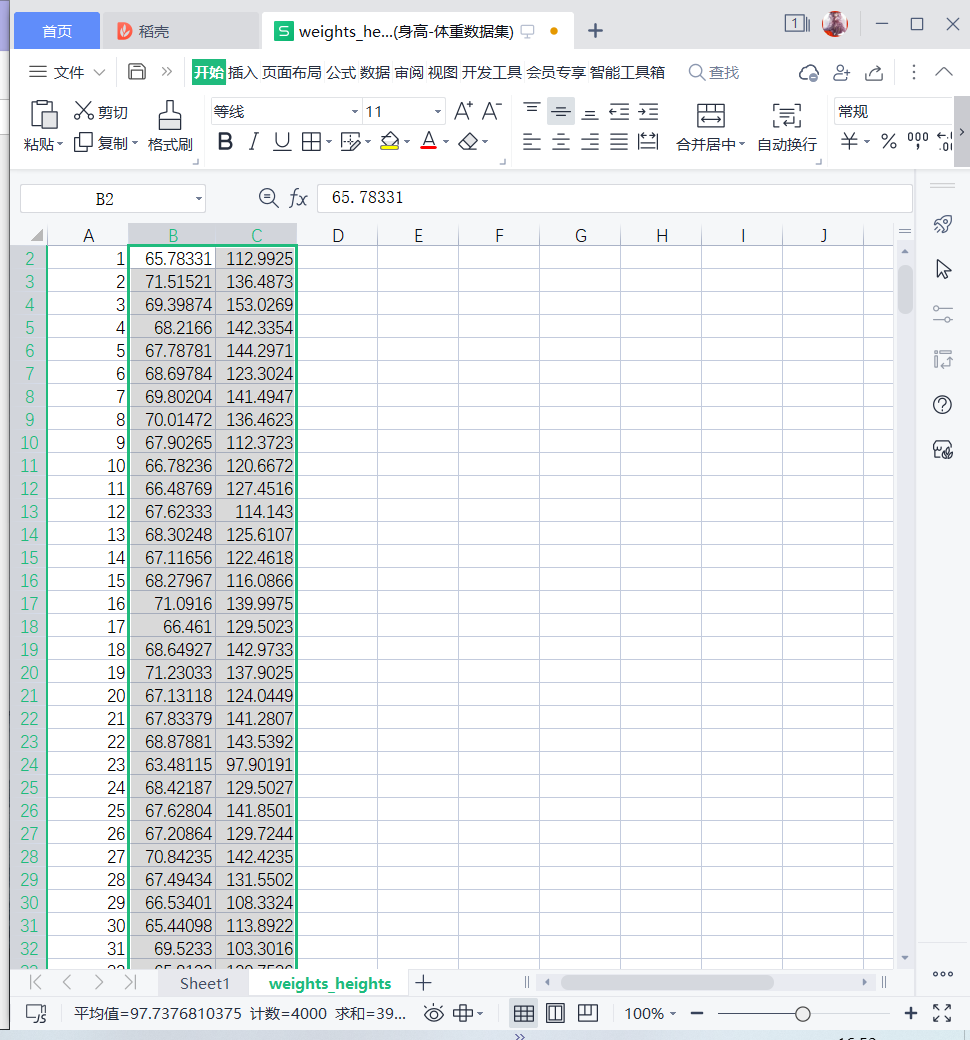

step2:选择插入，并选择散点图，第一个就行：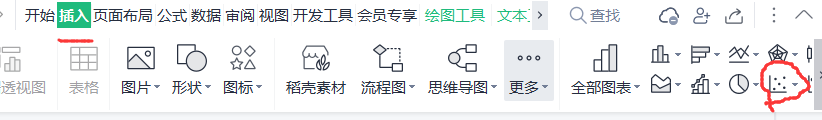


step3：随便选择一个点，鼠标右键并选择添加趋势线：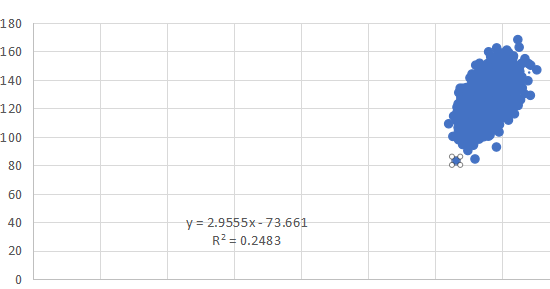

step4:点击趋势线，鼠标右键之后选择设置趋势线格式，然后选择显示公式和显示R平方值就行了
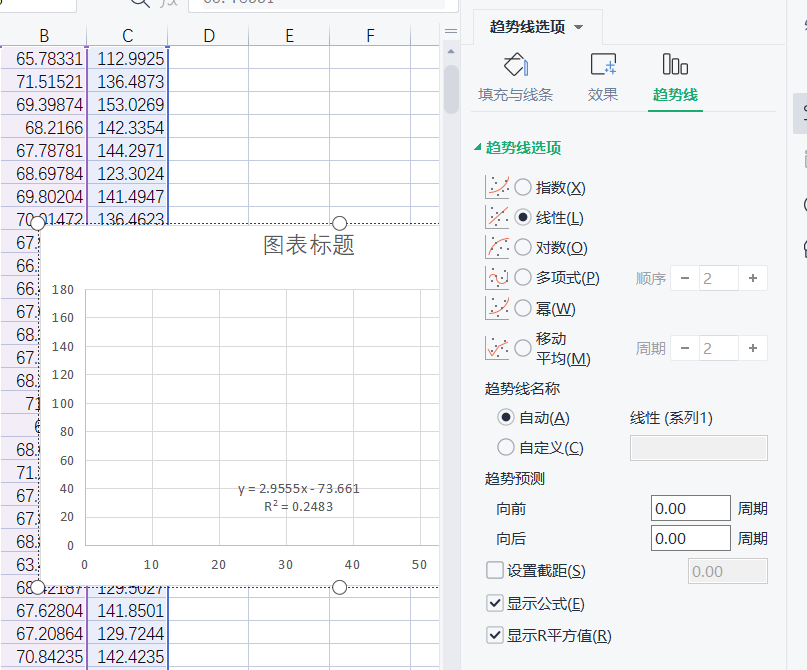


step5：叉掉旁边的界面，就可以在图上直接看到公式与相关系数的值了。
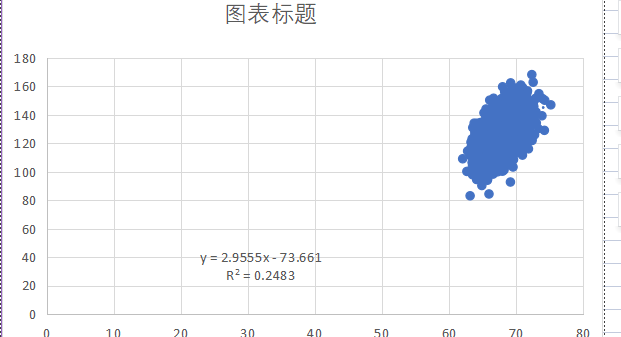

### 3.2 分析结果

20组数据的结果：
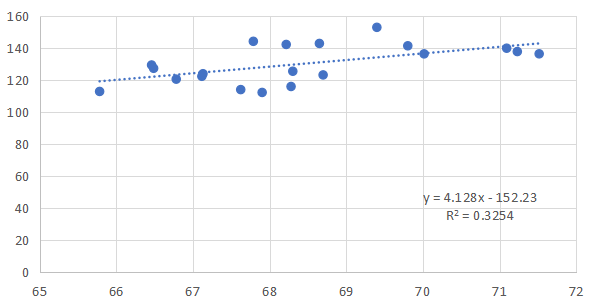

200组数据的结果：
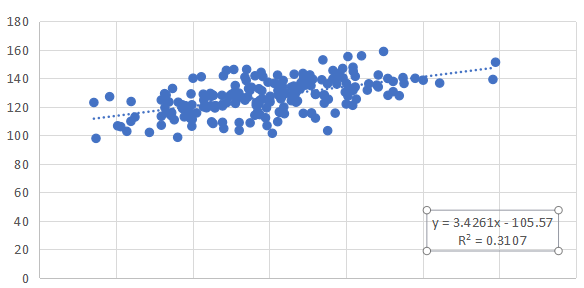

2000组数据的结果：
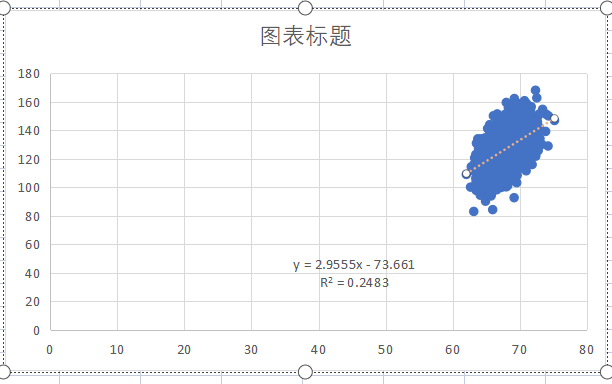

20000组数据的结果：
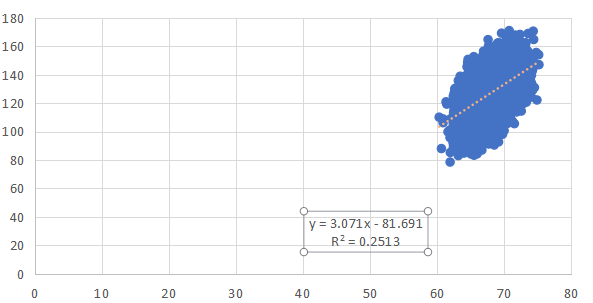

## 四、总结

  用最小二乘法来得到一元线性回归方程还是比较简单的，不管是用哪种方法。excel方式要记得操作方式，用调用包的方式做要记住相应的函数，自己写则要记住相应的公式。这次作业让我
动手实践最小二乘法来实现一元线性回归，同时也初步了解了机器学习和复习了一些统计学的一些相关知识。